<a href="https://colab.research.google.com/github/gaara12-cpu/G7S21_242_DDIM_Proyectofinal3parcial_ehvm/blob/master/cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.7014 - loss: 0.6925 - val_accuracy: 0.5962 - val_loss: 0.6917
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.6409 - loss: 0.6907 - val_accuracy: 0.5962 - val_loss: 0.6896
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6630 - loss: 0.6877 - val_accuracy: 0.6346 - val_loss: 0.6863
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7210 - loss: 0.6831 - val_accuracy: 0.6923 - val_loss: 0.6812
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7662 - loss: 0.6770 - val_accuracy: 0.8462 - val_loss: 0.6740
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8358 - loss: 0.6670 - val_accuracy: 0.8846 - val_loss: 0.6636
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8826 - loss: 0.6552 - val_accuracy: 0.9038 - val_loss: 0.6494
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8963 - loss: 0.6369 - val_accuracy: 0.9038 - val_loss: 0.630

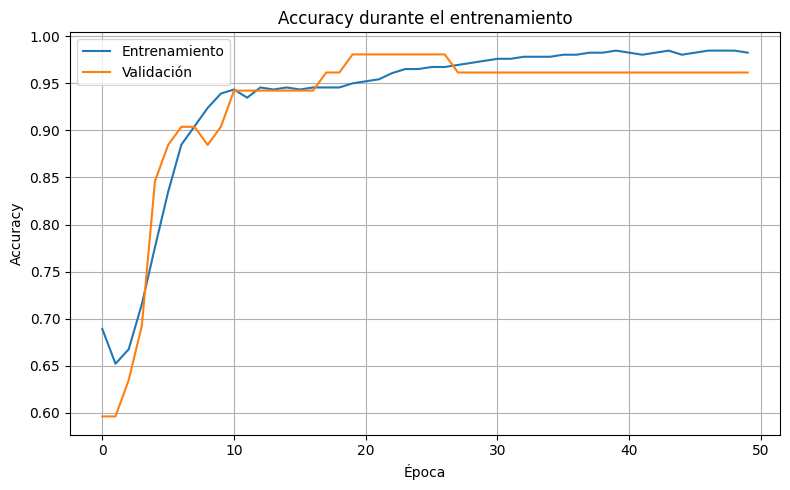

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


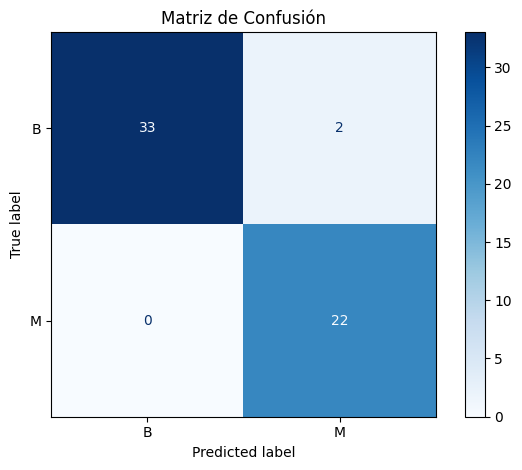

In [34]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Cargar datos
data = pd.read_csv('data.csv')
del data['Unnamed: 32']  # Eliminar columna vacía

# Seleccionar variables
X = data.iloc[:, 2:].values  # Variables numéricas
y = data.iloc[:, 1].values   # Diagnóstico (M/B)

# Codificar etiquetas (M = 1, B = 0)
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# Dividir el dataset (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Escalado de características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construcción del modelo
classifier = Sequential()
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compilación del modelo
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento (50 épocas)
history = classifier.fit(X_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

# Gráfica del accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predicción en el set de prueba
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.grid(False)
plt.tight_layout()
plt.show()
